# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


596

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Set up the base url and parameters
base_url = "http://api.openweathermap.org/data/2.5/weather"
params = {
    "appid": weather_api_key,
    "units": "imperial"
}

# Set counters to initial values
city_counter = 1
set_counter = 1
set_size = 50
found_city_id = 0

# Create Column Headers and an empty Row list to hold the weather data
weather_columns=["City_ID" ,"City", "Cloudiness", "Country" ,"Date", "Humidity", "Lat" ,"Lng", "Max Temp","Wind Speed"]
weather_rows = []

# Print the starting message to console
print("Beginning Data Retrieval")
print("------------------------------")

# Set Start Time to use for checking # of API calls per minute
start_time = time.time()

# Loop through each city
for city in cities:
    # Set the last parameter to the city
    params['q'] = city
    
    # Print the processing city message to console
    print(f"Processing Record {city_counter} of Set {set_counter} | {city}")
    
    # Make API call
    response = requests.get(base_url, params=params).json()
    
    try:
        # Use the response data to create a row of data and append to the weather rows list, increment found city counter
        weather_row = [found_city_id, city, response["clouds"]["all"], response["sys"]["country"], response["dt"], response["main"]["humidity"], response["coord"]["lat"], response["coord"]["lon"], response["main"]["temp_max"], response["wind"]["speed"]]
        weather_rows.append(weather_row)
        found_city_id += 1
    except KeyError:
        # Error condition if data is not found, Print message to console
        print("City not found. Skipping...")

    # Increment the city counter, if city counter is greater then the group size reset city counter to 1 and increment the set counter
    city_counter += 1
    if city_counter > set_size:
        city_counter = 1
        set_counter += 1
        # Wait until 1 minute has passed from the previous start time
        time.sleep(60 - (time.time() - start_time))
        # Set new start time
        start_time = time.time()

# Create the weather_df DataFrame using the Column Header and Rows List
weather_df = pd.DataFrame(weather_rows, columns=weather_columns)


Beginning Data Retrieval
------------------------------
Processing Record 1 of Set 1 | upernavik
Processing Record 2 of Set 1 | muravlenko
Processing Record 3 of Set 1 | price
Processing Record 4 of Set 1 | butaritari
Processing Record 5 of Set 1 | bure
Processing Record 6 of Set 1 | tutin
Processing Record 7 of Set 1 | busselton
Processing Record 8 of Set 1 | kapaa
Processing Record 9 of Set 1 | socorro
Processing Record 10 of Set 1 | vokhma
Processing Record 11 of Set 1 | hilo
Processing Record 12 of Set 1 | pacific grove
Processing Record 13 of Set 1 | tuktoyaktuk
Processing Record 14 of Set 1 | sechura
Processing Record 15 of Set 1 | severo-kurilsk
Processing Record 16 of Set 1 | nanortalik
Processing Record 17 of Set 1 | port alfred
Processing Record 18 of Set 1 | caravelas
Processing Record 19 of Set 1 | tasiilaq
Processing Record 20 of Set 1 | amderma
City not found. Skipping...
Processing Record 21 of Set 1 | puerto del rosario
Processing Record 22 of Set 1 | ndele
Processing R

Processing Record 37 of Set 4 | castro
Processing Record 38 of Set 4 | cape town
Processing Record 39 of Set 4 | chernyshevskiy
Processing Record 40 of Set 4 | ballina
Processing Record 41 of Set 4 | thompson
Processing Record 42 of Set 4 | san remigio
Processing Record 43 of Set 4 | vangaindrano
Processing Record 44 of Set 4 | attawapiskat
City not found. Skipping...
Processing Record 45 of Set 4 | lerwick
Processing Record 46 of Set 4 | nanakuli
Processing Record 47 of Set 4 | victoria
Processing Record 48 of Set 4 | vila velha
Processing Record 49 of Set 4 | teknaf
Processing Record 50 of Set 4 | lorengau
Processing Record 1 of Set 5 | elliot lake
Processing Record 2 of Set 5 | sentyabrskiy
City not found. Skipping...
Processing Record 3 of Set 5 | port elizabeth
Processing Record 4 of Set 5 | khandyga
Processing Record 5 of Set 5 | edd
Processing Record 6 of Set 5 | torbay
Processing Record 7 of Set 5 | hovd
Processing Record 8 of Set 5 | qaanaaq
Processing Record 9 of Set 5 | aver

Processing Record 25 of Set 8 | sioux lookout
Processing Record 26 of Set 8 | nemuro
Processing Record 27 of Set 8 | nara
Processing Record 28 of Set 8 | sao filipe
Processing Record 29 of Set 8 | north platte
Processing Record 30 of Set 8 | gamba
Processing Record 31 of Set 8 | yuksekova
Processing Record 32 of Set 8 | sinnamary
Processing Record 33 of Set 8 | puerto narino
Processing Record 34 of Set 8 | hualmay
Processing Record 35 of Set 8 | eresos
Processing Record 36 of Set 8 | matamoros
Processing Record 37 of Set 8 | ambon
Processing Record 38 of Set 8 | agadir
Processing Record 39 of Set 8 | rundu
Processing Record 40 of Set 8 | atar
Processing Record 41 of Set 8 | coihaique
Processing Record 42 of Set 8 | chandler
Processing Record 43 of Set 8 | ranong
Processing Record 44 of Set 8 | lagunas
Processing Record 45 of Set 8 | la orilla
Processing Record 46 of Set 8 | kushiro
Processing Record 47 of Set 8 | penzance
Processing Record 48 of Set 8 | kundiawa
Processing Record 49 of

Processing Record 15 of Set 12 | jinchengjiang
City not found. Skipping...
Processing Record 16 of Set 12 | jalu
Processing Record 17 of Set 12 | manacapuru
Processing Record 18 of Set 12 | bubaque
Processing Record 19 of Set 12 | tanabe
Processing Record 20 of Set 12 | dharchula
Processing Record 21 of Set 12 | atambua
Processing Record 22 of Set 12 | darnah
Processing Record 23 of Set 12 | powell river
Processing Record 24 of Set 12 | miura
Processing Record 25 of Set 12 | ledyard
Processing Record 26 of Set 12 | gayny
Processing Record 27 of Set 12 | trairi
Processing Record 28 of Set 12 | kamaishi
Processing Record 29 of Set 12 | sann
Processing Record 30 of Set 12 | tromso
Processing Record 31 of Set 12 | charters towers
Processing Record 32 of Set 12 | morros
Processing Record 33 of Set 12 | verkhniy avzyan
Processing Record 34 of Set 12 | sa kaeo
Processing Record 35 of Set 12 | tarauaca
Processing Record 36 of Set 12 | goundam
Processing Record 37 of Set 12 | sansai
City not fo

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Write the DataFrame to a csv file
weather_df.to_csv(output_data_file, index=False, header=True)

# Drop City_ID column as it is no longer needed
weather_df.drop(columns="City_ID",inplace=True)

# Display the DataFrame
weather_df

# Get the maximum date value from the weather data and convert to mm/dd/yy format
run_date = time.strftime("%D", time.localtime(int(weather_df["Date"].max())))


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

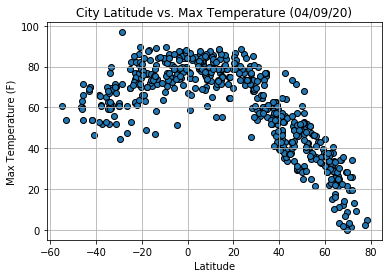

In [5]:
# Create scatter plot for Latitude vs Max Temp, include grid lines, labels, and title
plt.scatter(weather_df["Lat"],weather_df["Max Temp"],edgecolors="black")
plt.grid(b=True)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs. Max Temperature ({run_date})")

# Save the scatter plot to a file
plt.savefig("../output_data/LatvTemp.png")
# Display scatter plot
plt.show()

Each circle represents the maximum temperature for a city and the city's latitude.  This chart shows the relationship between the latitude and the maximum temperature.  The chart shows that as the latitude is further away from 0 degrees the temperature decreases.

#### Latitude vs. Humidity Plot

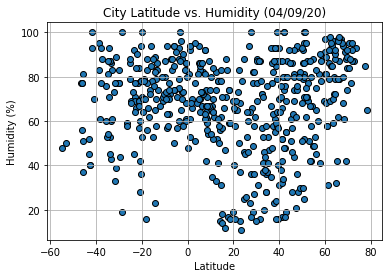

In [6]:
# Create scatter plot for Latitude vs Humidity, include grid lines, labels, and title
plt.scatter(weather_df["Lat"],weather_df["Humidity"],edgecolors="black")
plt.grid(b=True)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity ({run_date})")

# Save the scatter plot to a file
plt.savefig("../output_data/LatvHumidity.png")
# Display scatter plot
plt.show()

Each circle represents the humidity for a city and the city's latitude.  This chart shows the relationship between the latitude and the humidity.  The chart shows that the humidity is over 60% in most cities but the latitude is not a factor in the humidity levels.

#### Latitude vs. Cloudiness Plot

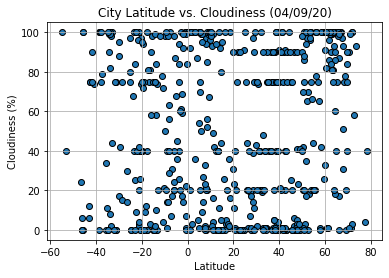

In [7]:
# Create scatter plot for Latitude vs Cloudiness, include grid lines, labels, and title
plt.scatter(weather_df["Lat"],weather_df["Cloudiness"],edgecolors="black")
plt.grid(b=True)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness ({run_date})")

# Save the scatter plot to a file
plt.savefig("../output_data/LatvCloudiness.png")
# Display scatter plot
plt.show()

Each circle represents the cloudiness percentage for a city and the city's latitude.  This chart shows the relationship between the latitude and the cloudiness percentage.  The chart shows that the cloudiness percentage has many datapoints at some specific percentages (0, 20, 40, 75, 90 and 100) and a smaller scattering of other values.  The cloudiness percentage is evenly distributed among each latitude value indicating there is little relationship between latitude and cloudiness.

#### Latitude vs. Wind Speed Plot

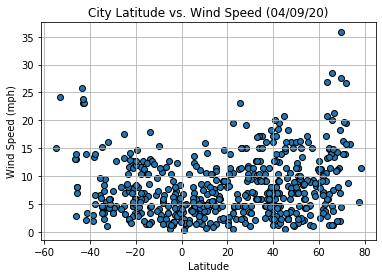

In [8]:
# Create scatter plot for Latitude vs Wind Speed, include grid lines, labels, and title
plt.scatter(weather_df["Lat"],weather_df["Wind Speed"],edgecolors="black")
plt.grid(b=True)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs. Wind Speed ({run_date})")

# Save the scatter plot to a file
plt.savefig("../output_data/LatvWind.png")
# Display scatter plot
plt.show()

Each circle represents the wind speed for a city and the city's latitude.  This chart shows the relationship between the latitude and the wind speed.  The chart shows that the wind speed is mostly under 10 mph.  The wind speed is evenly distributed among each latitude value indicating there is little relationship between latitude and wind speed.

## Linear Regression

In [9]:
# Create a function to create Linear Regression plots
# Parameters: 
#    x_values - Data for X-Axis
#    y_values - Data for Y-Axis
#    x_label - Label for X-Axis
#    y_label - Label for X-Axis
#    Title - Title for Chart

def get_regression_data(x_values, y_values,x_label,y_label,title,filename):
    
    # Call linregress function, use results to set the equation
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Identify the best place to write the equation on the chart
    if (slope < -0.5) | ((slope < 0) & (y_values.mean() < y_values.median())):
        # Put the equation in lower left corner
        annotate_xy = (x_values.min(),y_values.min()+3)
    elif (slope > 0.5) | ((slope > 0) & (y_values.median() < y_values.mean())):
        # Put the equation in upper left corner
        annotate_xy = (x_values.min(),y_values.max()-3)
    elif (slope < 0) & (y_values.median() < y_values.mean()):
        # Put the equation in upper right corner
        annotate_xy = (x_values.max() - .4*(x_values.max() - x_values.min()),y_values.max()-3)
    else:
        # Put the equation in lower right corner
        annotate_xy = (x_values.max() - .4*(x_values.max() - x_values.min()),y_values.min()+3)

    # Print r-squared value to console
    print(f"r-squared: {rvalue**2}")
    
    # Create scatter plot
    plt.scatter(x_values,y_values,edgecolors="black")
    
    # Create regression line
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,annotate_xy,fontsize=15,color="red")
    
    # Add labels and title to scatter plot
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(f"{title} ({run_date})")
    
    # Save the regression chart to a file
    plt.savefig("../output_data/" + filename + ".png")
    # Display the scatter plot
    plt.show()


In [10]:
# Create Northern and Southern Hemisphere DataFrames using 0 degrees Latitude
northern_hemisphere_df = weather_df.loc[weather_df["Lat"] >= 0]
southern_hemisphere_df = weather_df.loc[weather_df["Lat"] < 0]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

r-squared: 0.7979220486692248


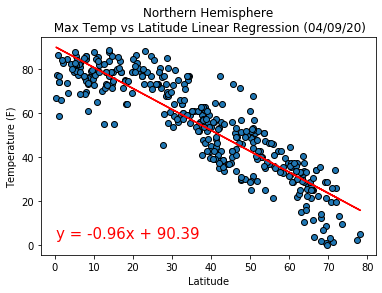

In [11]:
# Call get_regression_data to display Northern Hemisphere Max Temp vs Latitiude chart
get_regression_data(northern_hemisphere_df["Lat"],northern_hemisphere_df["Max Temp"],"Latitude","Temperature (F)","Northern Hemisphere\n Max Temp vs Latitude Linear Regression","NH_Temp")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

r-squared: 0.3707214753009154


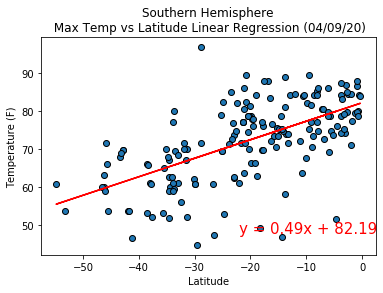

In [12]:
# Call get_regression_data to display Southern Hemisphere Max Temp vs Latitiude chart
get_regression_data(southern_hemisphere_df["Lat"],southern_hemisphere_df["Max Temp"],"Latitude","Temperature (F)","Southern Hemisphere\n Max Temp vs Latitude Linear Regression","SH_Temp")

These charts show the relationship between Maximum Temperature and Latitude for both the Northern and Southern Hemispheres.  Both charts show that the temperature decreases as the latitude is further away from 0 but the Northern Hemisphere shows this more clearly.  The r-squared values for both charts indicate a strong relationship between Maximum Temperature and Latitude.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r-squared: 0.05225524398899091


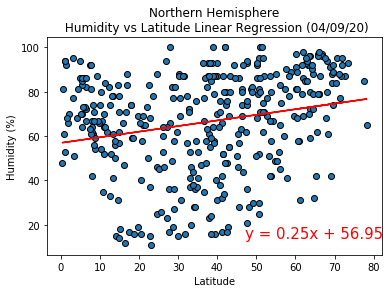

In [13]:
# Call get_regression_data to display Northern Hemisphere Humidity vs Latitiude chart
get_regression_data(northern_hemisphere_df["Lat"],northern_hemisphere_df["Humidity"],"Latitude","Humidity (%)","Northern Hemisphere\n Humidity vs Latitude Linear Regression","NH_Humidity")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r-squared: 0.04599945622583901


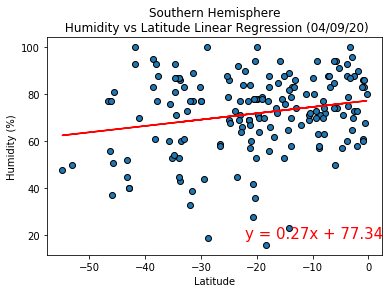

In [14]:
# Call get_regression_data to display Southern Hemisphere Humidity vs Latitiude chart
get_regression_data(southern_hemisphere_df["Lat"],southern_hemisphere_df["Humidity"],"Latitude","Humidity (%)","Southern Hemisphere\n Humidity vs Latitude Linear Regression","SH_Humidity")

These charts show the relationship between Humidity and Latitude for both the Northern and Southern Hemispheres.  The results for this are contradictory.  In the Northern Hemisphere, the humidity is increasing as the latitude is further away from 0 degrees but in the Southern Hemisphere humidity is decreasing as the latitude is further away from 0 degrees.  The r-squared values for both charts do not indicate a strong relationship between Humidity and Latitude.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r-squared: 0.017612681961085144


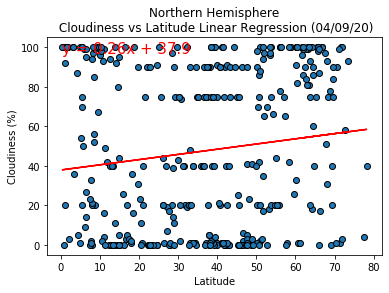

In [15]:
# Call get_regression_data to display Northern Hemisphere Cloudiness vs Latitiude chart
get_regression_data(northern_hemisphere_df["Lat"],northern_hemisphere_df["Cloudiness"],"Latitude","Cloudiness (%)","Northern Hemisphere\n Cloudiness vs Latitude Linear Regression","NH_Cloud")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r-squared: 0.0001647575545328687


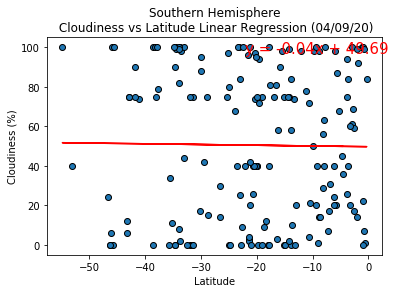

In [16]:
# Call get_regression_data to display Southern Hemisphere Cloudiness vs Latitiude chart
get_regression_data(southern_hemisphere_df["Lat"],southern_hemisphere_df["Cloudiness"],"Latitude","Cloudiness (%)","Southern Hemisphere\n Cloudiness vs Latitude Linear Regression","SH_Cloud")

These charts show the relationship between Cloudiness and Latitude for both the Northern and Southern Hemispheres.  For both charts the data is evenly distributed among the latitude values.  There are also many values at 0%, 20%, 40%, 75%, 90%, and 100%.  This indicates that this measurement is inexact and may based more on an estimate.  The r-squared values for both charts do not indicate a strong relationship between Cloudiness and Latitude.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r-squared: 0.10678175414228902


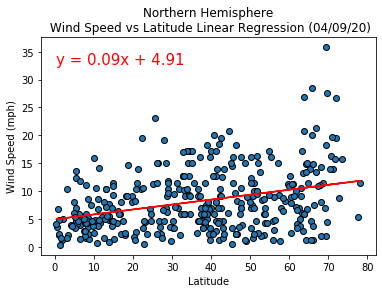

In [17]:
# Call get_regression_data to display Northern Hemisphere Wind Speed vs Latitiude chart
get_regression_data(northern_hemisphere_df["Lat"],northern_hemisphere_df["Wind Speed"],"Latitude","Wind Speed (mph)","Northern Hemisphere\n Wind Speed vs Latitude Linear Regression","NH_Wind")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r-squared: 0.11665813552781124


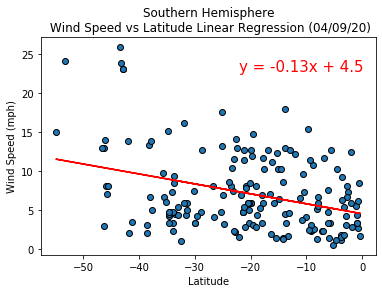

In [18]:
# Call get_regression_data to display Southern Hemisphere Wind Speed vs Latitiude chart
get_regression_data(southern_hemisphere_df["Lat"],southern_hemisphere_df["Wind Speed"],"Latitude","Wind Speed (mph)","Southern Hemisphere\n Wind Speed vs Latitude Linear Regression","SH_Wind")

These charts show the relationship between Wind Speed and Latitude for both the Northern and Southern Hemispheres.  For both charts there is an increase in wind speed as the latitude is further away from 0 degrees.  The r-squared values for both charts indicate a slight relationship between Cloudiness and Latitude.

Final Observations:

Based on the charts it is clear that the temperature is higher as latitude approaches the equator.  

The charts for cloudiness showed a large number of values at certain percentage values that would be considered "neat" values (0,20,40,75,90,100). This indicates that this might be difficult to measure and is based on estimation.  

The humidity percentage was the one category that did not mirror itself in each hemisphere.  Temperature and wind both increased further from the equator in both the North and South hemispheres.  Cloudiness was nearly the same regardless of the latitude.  The humidity increased in the Northern Hemisphere and decreased in the Southern Hemisphere the further away from the equator.